# Ejercicio de Feedback 1, por Carlos Bilbao Lara
---

Para la realizacion de este ejercicio se ha utilizado el csv extraido de la página: https://www.investing.com/equities/microsoft-corp-historical-data (MSFT) y https://www.investing.com/equities/amazon-com-inc-historical-data (AMZN) entre las fechas 01/01/2019 y 01/10/2023 tal y como se explica en el enunciado del ejercicio




## Parte 1
---

Extrae los campos Date, Price, Open, High, Low, Vol. and Change % de investing.com relacionados con un valor bursátil que sea de tu interés. El rango de tiempo será el siguiente:
Desde: 1 enero 2019
Hasta: 1 octubre 2023


a) A partir del fichero de texto que se baje de investing.com, cree un dataframe con esos datos y estudie su contenido utilizando funciones en python pandas. Ese estudio del contenido debe incluir:
- las primeras filas del dataframe,
- las últimas filas del dataframe,
- el índice que utiliza
- las columnas que tiene el dataframe

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# import csv as a dataframe
df = pd.read_csv("./MSFT Historical Data.csv")

# show the first 6 rows
print(df.head())

         Date   Price    Open    High     Low    Vol. Change %
0  09/29/2023  315.75  317.75  319.47  314.98  24.15M    0.67%
1  09/28/2023  313.64  310.99  315.48  309.45  19.30M    0.27%
2  09/27/2023  312.79  312.30  314.30  309.69  19.31M    0.21%
3  09/26/2023  312.14  315.13  315.88  310.02  26.06M   -1.70%
4  09/25/2023  317.54  316.59  317.67  315.00  16.54M    0.17%


In [38]:
# show the last 6 rows
print(df.tail())

            Date   Price    Open    High     Low    Vol. Change %
1190  01/08/2019  102.80  103.04  103.97  101.71  31.51M    0.73%
1191  01/07/2019  102.06  101.64  103.27  100.98  35.66M    0.13%
1192  01/04/2019  101.93   99.72  102.51   98.93  44.06M    4.65%
1193  01/03/2019   97.40  100.10  100.19   97.20  42.58M   -3.68%
1194  01/02/2019  101.12   99.55  101.75   98.94  35.33M   -0.44%


In [39]:
# show index
print(df.index)

RangeIndex(start=0, stop=1195, step=1)


In [40]:
# show columns available in the dataframe
print(df.columns)
#also
df[0:0]

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


,Date,Price,Open,High,Low,Vol.,Change %


In [41]:
# show basics stadistics
print(df.describe())

up_to_200 = df[df['Price'] > 200]
print(f"\nHow many days the price is higher than 200: {len(up_to_200)}")

            Price         Open         High          Low
count  1195.00000  1195.000000  1195.000000  1195.000000
mean    229.95087   229.875004   232.292452   227.398033
std      68.53901    68.585413    69.231166    67.858540
min      97.40000    99.550000   100.190000    97.200000
25%     166.91000   167.640000   170.350000   165.525000
50%     239.82000   238.700000   242.500000   235.940000
75%     286.14500   285.765000   289.250000   282.835000
max     359.49000   361.750000   366.780000   352.430000

How many days the price is higher than 200: 822


<function matplotlib.pyplot.show(close=None, block=None)>

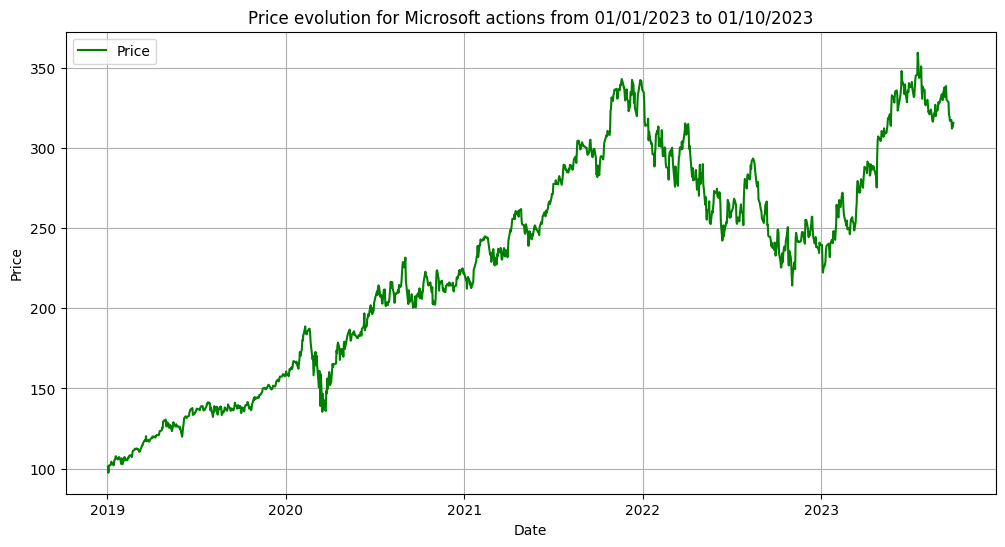

In [42]:
# price evolution throught this period of time
# convert the datetimes to be usefull
df["Date"] = pd.to_datetime(df["Date"])

#sort the dates to have it in order
df.sort_values("Date", inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], label="Price", color="green")
plt.title("Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show

In [43]:
# as it could be observe in the graphic, Microsfot actions price has got a big up,
# let see how many

price_at_01012019 = df["Price"].iloc[0] # the first one (it is sorted by date)
price_at_01102023 = df["Price"].iloc[-1] # the last one

percentage_gain = ((price_at_01102023 - price_at_01012019) / price_at_01012019) * 100

print(f"It has grown up: {percentage_gain}%")


It has grown up: 212.25276898734177%


b) Cree un dataframe basado en el dataframe inicial pero sólo con los datos relacionados con los días de cotización en el que el volumen de negociación superó el 50% de la media de todos los días.

In [44]:
# restoring the changes realized in the last question
df = pd.read_csv("./MSFT Historical Data.csv")

# taking the data only when the volume is up to the 50% of the mean:
# need to transform the Vol data to floats
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float)

# calculate the 50% of the average
average = df["Vol."].mean()
fifty_average = average*0.5

# create a second dataframe with all that are up to the 50% of the average
df_up_50_average= df[df["Vol."] > fifty_average]

print(f"The original dataframe has {len(df)} items and the new one has {len(df_up_50_average)} items\n")

# show an example of them
print(df_up_50_average.head())

The original dataframe has 1195 items and the new one has 1176 items

         Date   Price    Open    High     Low   Vol. Change %
0  09/29/2023  315.75  317.75  319.47  314.98  24.15    0.67%
1  09/28/2023  313.64  310.99  315.48  309.45  19.30    0.27%
2  09/27/2023  312.79  312.30  314.30  309.69  19.31    0.21%
3  09/26/2023  312.14  315.13  315.88  310.02  26.06   -1.70%
4  09/25/2023  317.54  316.59  317.67  315.00  16.54    0.17%


c) Cree un fichero de extension .csv con este dataframe que acaba de construir.

In [45]:
# export to csv

df_up_50_average.to_csv("up_50_average.csv")

d) Cree un plot con las columnas Price, Open, High and Low para todos los días de cotización de los datos que se bajó.

<function matplotlib.pyplot.show(close=None, block=None)>

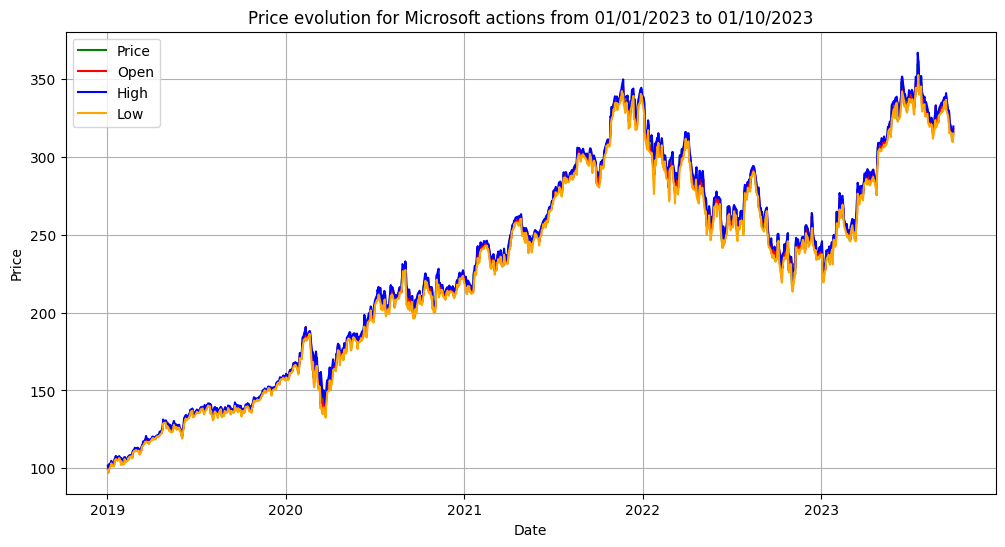

In [46]:
# restoring the changes realized in the last question
df = pd.read_csv("./MSFT Historical Data.csv")

# convert the datetimes to be usefull
df["Date"] = pd.to_datetime(df["Date"])
#sort the dates to have it in order by date
df.sort_values("Date", inplace=True)

# create the plot for Price, Open, High and Low
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], label="Price", color="green")
plt.plot(df["Date"], df["Open"], label="Open", color="red")
plt.plot(df["Date"], df["High"], label="High", color="blue")
plt.plot(df["Date"], df["Low"], label="Low", color="orange")

plt.title("Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show

e) Pinte cada gráfica de un color y cree la correspondiente leyenda.Importante: la leyenda no debe ocultar ninguna parte de la gráfica.

<function matplotlib.pyplot.show(close=None, block=None)>

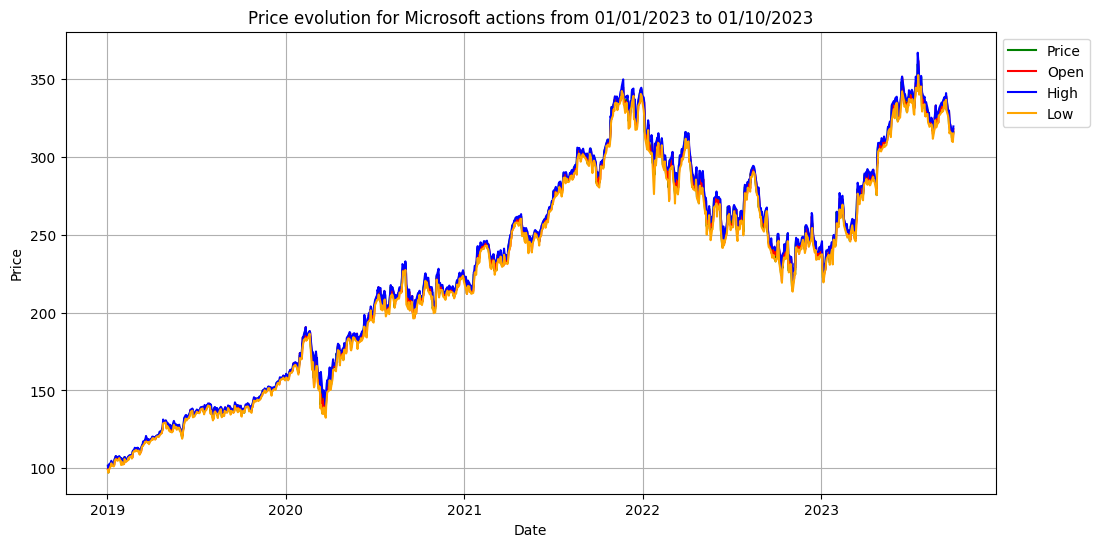

In [47]:
# create the plot for Price, Open, High and Low
# due to almost all the requisites were done above, just modify legend for this
# one
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], label="Price", color="green")
plt.plot(df["Date"], df["Open"], label="Open", color="red")
plt.plot(df["Date"], df["High"], label="High", color="blue")
plt.plot(df["Date"], df["Low"], label="Low", color="orange")

plt.title("Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
# Move the legend outside of the graphic
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show

e) Configure también los correspondientes eje x e y, el título del plot y sus unidades.

<function matplotlib.pyplot.show(close=None, block=None)>

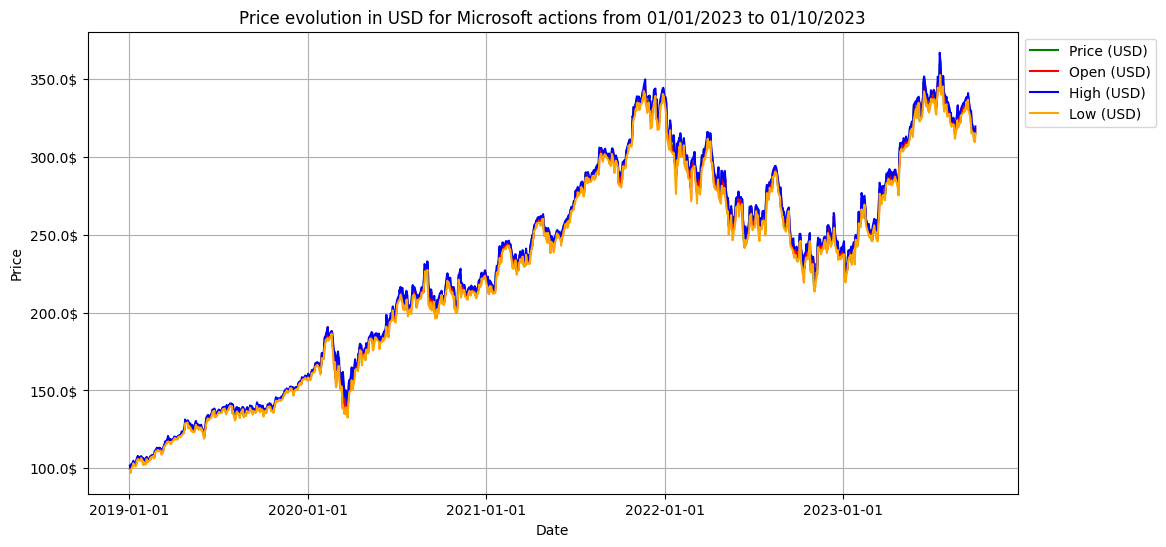

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], label="Price (USD)", color="green")
plt.plot(df["Date"], df["Open"], label="Open (USD)", color="red")
plt.plot(df["Date"], df["High"], label="High (USD)", color="blue")
plt.plot(df["Date"], df["Low"], label="Low (USD)", color="orange")

plt.title("Price evolution in USD for Microsoft actions from 01/01/2023 to 01/10/2023")
plt.xlabel("Date")
plt.ylabel("Price")

# formatter to add the date to x axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# formatter to add  $ symbol to y axis
format = mticker.FuncFormatter(lambda x, pos: f'{x}$')
plt.gca().yaxis.set_major_formatter(format)
plt.grid(True)

# move the legend outside the graphic
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show

## Parte 2


---


a) Utlizando el mismo dataframe inicial con todas las cotizaciones, ahora cree un histograma con el volumen de contratación diario.

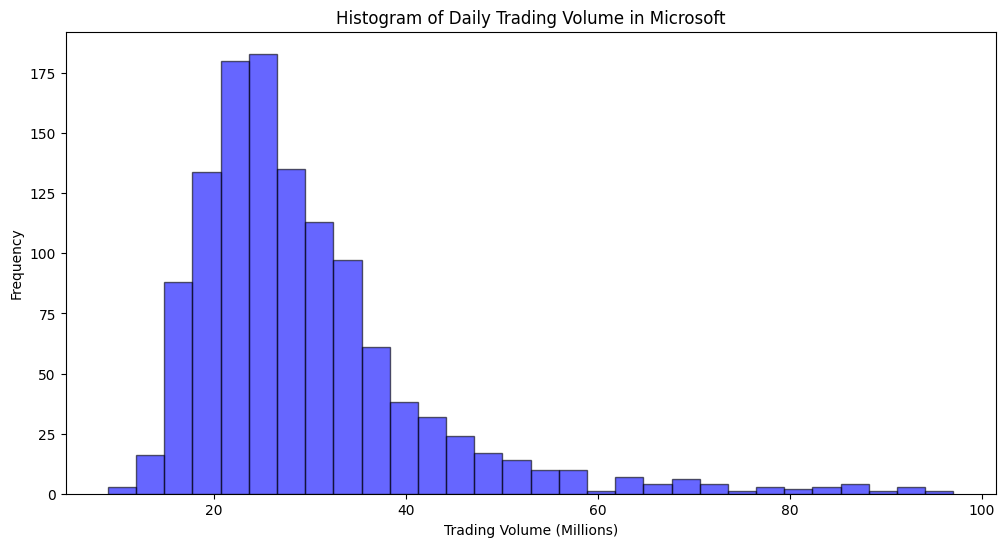

In [49]:
# restoring the changes realized in the last question
df = pd.read_csv("./MSFT Historical Data.csv")

# need to transform the Vol data to floats
df['Vol. float'] = df['Vol.'].str.replace('M', '').astype(float)

plt.figure(figsize=(12, 6))
plt.hist(df['Vol. float'], bins=30, color='blue', alpha=0.6, edgecolor='black')

plt.title('Histogram of Daily Trading Volume in Microsoft')
plt.xlabel('Trading Volume (Millions)')
plt.ylabel('Frequency')
plt.show()

# This histogram reflects the frequency of different trading volumes divided the
# range of volumes into 30 equal intervals (or bins)

b) Cree otro histograma con el porcentaje de cambio de la cotización diario

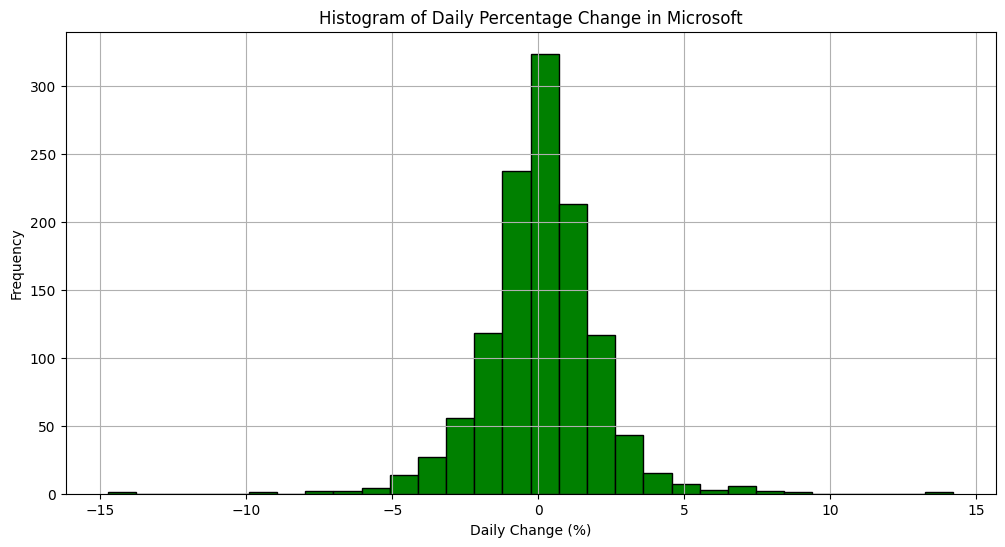

In [50]:
# Convert change % column into a numeric column
df['Change float'] = df['Change %'].str.replace('%', '').astype(float)

# Create the histogram for this new column
plt.figure(figsize=(12, 6))
plt.hist(df['Change float'], bins=30, color='green', edgecolor='black',
         label="Change %")
plt.title('Histogram of Daily Percentage Change in Microsoft')
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


c) Añada la suficiente información al gráfico (leyenda, ejes, título, colores).


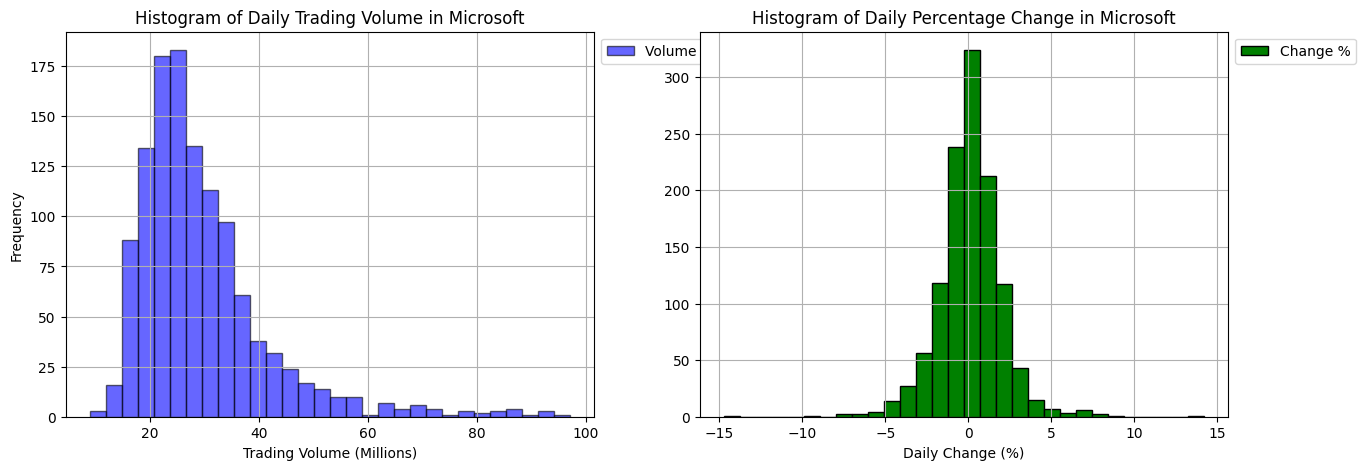

In [51]:
# restoring the changes realized in the last question
df = pd.read_csv("./MSFT Historical Data.csv")

# need to transform the Vol data to floats
df['Vol. float'] = df['Vol.'].str.replace('M', '').astype(float)

# need to transform the change % column to floats
df['Change float'] = df['Change %'].str.replace('%', '').astype(float)


# Create 2 plots in order to have them side by side and easier to view
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram for Trading Volume
axes[0].hist(df['Vol. float'], bins=30, color='blue', alpha=0.6, edgecolor='black', label="Volume by millions")
axes[0].set_title('Histogram of Daily Trading Volume in Microsoft')
axes[0].set_xlabel('Trading Volume (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid(True)

# Histogram for Daily Percentage Change
axes[1].hist(df['Change float'], bins=30, color='green', edgecolor='black', label="Change %")
axes[1].set_title('Histogram of Daily Percentage Change in Microsoft')
axes[1].set_xlabel('Daily Change (%)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[1].grid(True)

plt.show()


d) Cree dos nuevos histogramas. En esta ocasión, en ambos histogramas, añada la misma información sobre su acción (pasos a,b y c de esta parte 2), pero ahora añadiendo también los mismos datos de otra acción de bolsa perteneciente a un competidor de la primera acción que usted eligiera

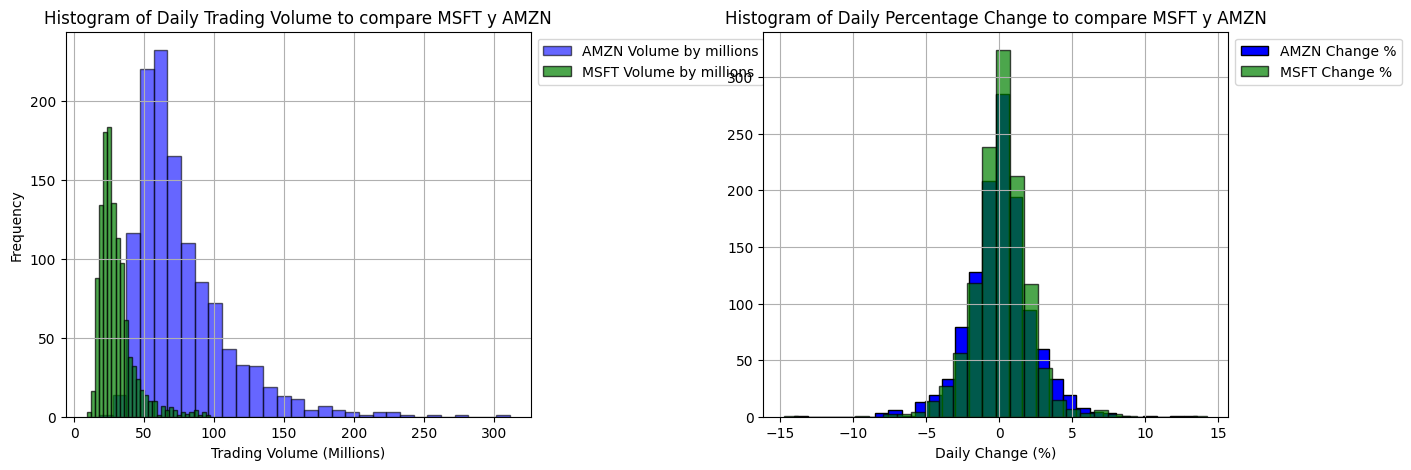

In [52]:
# restoring the changes realized in the last question
df_competitor = pd.read_csv("./AMZN Historical Data.csv")

# need to transform the Vol data to floats
df_competitor['Vol. float'] = df_competitor['Vol.'].str.replace('M', '').astype(float)

# need to transform the change % column to floats
df_competitor['Change float'] = df_competitor['Change %'].str.replace('%', '').astype(float)

# despues de preguntar en clase, los 2 histogramas en la misma gráfica se puede
# con el fin de analizar mejor estos resultados, lo haré de ese modo

# Create 2 plots in order to have them side by side and easier to view
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram for Trading Volume
axes[0].hist(df_competitor['Vol. float'], bins=30, color='blue', alpha=0.6, edgecolor='black', label="AMZN Volume by millions")
axes[0].hist(df['Vol. float'], bins=30, color='green', alpha=0.7, edgecolor='black', label="MSFT Volume by millions")
axes[0].set_title('Histogram of Daily Trading Volume to compare MSFT y AMZN')
axes[0].set_xlabel('Trading Volume (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid(True)

# Histogram for Daily Percentage Change
axes[1].hist(df_competitor['Change float'], bins=30, color='blue', edgecolor='black', label="AMZN Change %")
axes[1].hist(df['Change float'], bins=30,alpha=0.7, color='green', edgecolor='black', label="MSFT Change %")

axes[1].set_title('Histogram of Daily Percentage Change to compare MSFT y AMZN')
axes[1].set_xlabel('Daily Change (%)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[1].grid(True)

plt.subplots_adjust(wspace=0.5)
plt.show()

e) Añada la suficiente información al gráfico (leyenda, ejes, título, colores).

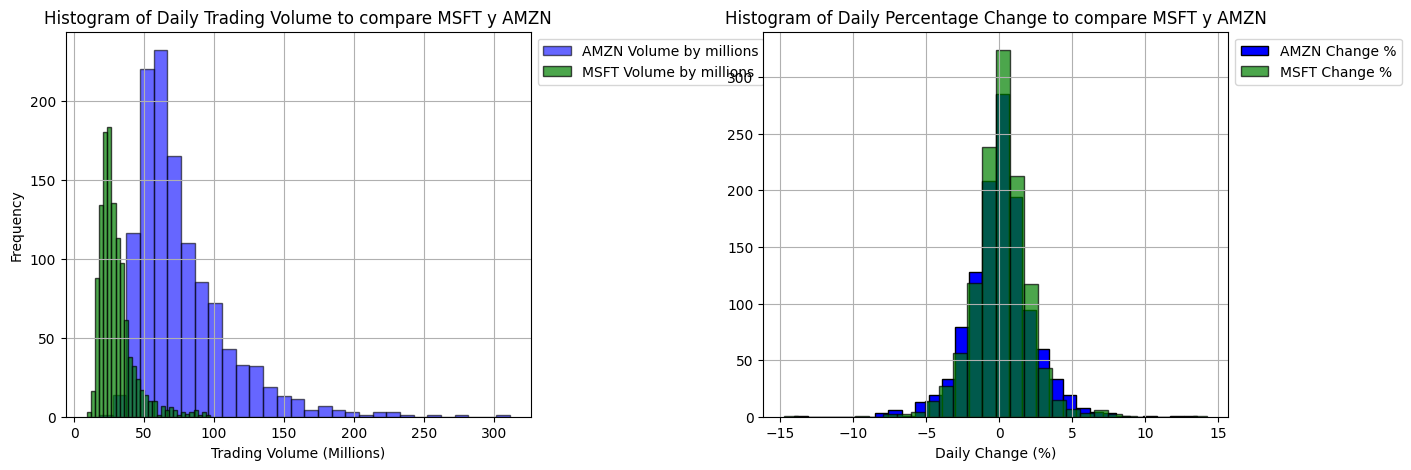

In [53]:
# Create 2 plots in order to have them side by side and easier to view
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram for Trading Volume
axes[0].hist(df_competitor['Vol. float'], bins=30, color='blue', alpha=0.6, edgecolor='black', label="AMZN Volume by millions")
axes[0].hist(df['Vol. float'], bins=30, color='green', alpha=0.7, edgecolor='black', label="MSFT Volume by millions")
axes[0].set_title('Histogram of Daily Trading Volume to compare MSFT y AMZN')
axes[0].set_xlabel('Trading Volume (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid(True)

# Histogram for Daily Percentage Change
axes[1].hist(df_competitor['Change float'], bins=30, color='blue', edgecolor='black', label="AMZN Change %")
axes[1].hist(df['Change float'], bins=30,alpha=0.7, color='green', edgecolor='black', label="MSFT Change %")
axes[1].set_title('Histogram of Daily Percentage Change to compare MSFT y AMZN')
axes[1].set_xlabel('Daily Change (%)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[1].grid(True)

plt.subplots_adjust(wspace=0.5)
plt.show()

Escriba como comentario un breve párrafo con las conclusiones de los histogramas creados.

Observando el primer gráfico (Comparacion de Volumenes) se puede extraer que la empresa Amazon (AMZN),
en azul mueve habitualmente mayores cantidades de dinero, siendo la diferencia  entre sus máximos de 200 millones de USDs que Microsfot (MSFT) en verde. Del mismo modo, se puede extraer que los Volumenes de Microsoft se concentran en un rango más estrecho, lo que sugiere menos volatilidad

En la segunda gráfica (% de cambio) se puede observar que ambas empresas tienen una distribucion similar, acumulando la mayoriade los cambios alrededor del 0. Sin embargo Amazon tiende a ser menos un poco menos estable y realizar mayor porcentaje de variaciones tanto a positivo como a negativo. Algo que se contrasta con la información obtenida en la gráfica anterior con los Volumenes

## PARTE 3


---

a) Utilizando scipy, calcule la función PDF y CDF de los cuatro histogramas que creón en la parte
2.

In [56]:
import numpy as np
import scipy.stats as stats

# PDF para AMZN Volume and change
amzn_vol_kde = stats.gaussian_kde(df_competitor['Vol. float'])
x_amzn_vol = np.linspace(min(df_competitor['Vol. float']), max(df_competitor['Vol. float']), 1000)
pdf_amzn_vol = amzn_vol_kde(x_amzn_vol)
change_amzn_vol_kde = stats.gaussian_kde(df_competitor['Change float'])
change_x_amzn_vol = np.linspace(min(df_competitor['Change float']), max(df_competitor['Vol. float']), 1000)
change_pdf_amzn_vol = change_amzn_vol_kde(change_x_amzn_vol)

# PDF para MSFT Volume and change
msft_vol_kde = stats.gaussian_kde(df['Vol. float'])
x_msft_vol = np.linspace(min(df['Vol. float']), max(df['Vol. float']), 1000)
pdf_msft_vol = msft_vol_kde(x_msft_vol)
change_msft_vol_kde = stats.gaussian_kde(df['Change float'])
change_x_msft_vol = np.linspace(min(df['Change float']), max(df['Vol. float']), 1000)
change_pdf_msft_vol = change_msft_vol_kde(change_x_msft_vol)

# CDF para AMZN Volume and change
cdf_amzn_vol = np.cumsum(pdf_amzn_vol)
cdf_amzn_vol /= cdf_amzn_vol[-1]
change_cdf_amzn_vol = np.cumsum(change_pdf_amzn_vol)
change_cdf_amzn_vol /= change_cdf_amzn_vol[-1]

# CDF para MSFT Volume  and change
cdf_msft_vol = np.cumsum(pdf_msft_vol)
cdf_msft_vol /= cdf_msft_vol[-1]
change_cdf_msft_vol = np.cumsum(change_pdf_msft_vol)
change_cdf_msft_vol /= change_cdf_msft_vol[-1]



FALTAN LOS DE Change % !!!!!!!!!!!!!!!!!!!!! ahi arriba